# Simulação de Padrões de Turing e Estruturas Dissipativas — Modelo Gray-Scott

### Amostras De Caminhos (Path Integral Monte Carlo) Oscilador Harmônico 1D:

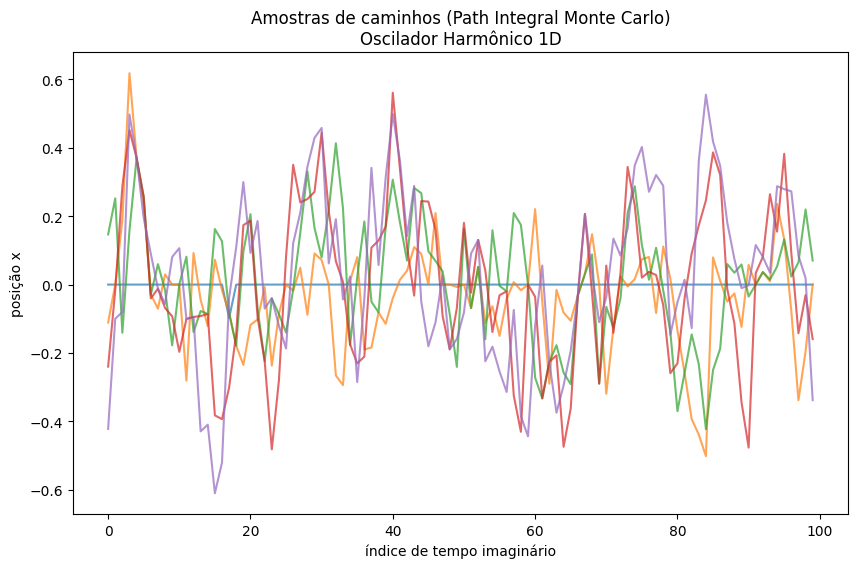

In [1]:
# Vamos criar uma primeira parte: 
# Simular um Path Integral Monte Carlo (PIMC) para um oscilador harmônico 1D
# usando discretização simples para ilustrar a ideia básica.

import numpy as np
import matplotlib.pyplot as plt

# ------------------------
# 1) Parâmetros do sistema
# ------------------------
m = 1.0         # massa
omega = 1.0     # frequência natural
beta = 4.0      # inversa da temperatura (1/kT)
N = 100         # número de divisões no tempo imaginário
dtau = beta / N # passo no tempo imaginário

n_steps = 5000  # número de passos Monte Carlo

# ------------------------
# 2) Inicialização
# ------------------------
path = np.zeros(N)  # caminho inicial: tudo zero
paths = []          # para guardar amostras para plot

# ------------------------
# 3) Função de ação euclidiana
# ------------------------
def S(path):
    """Calcula ação euclidiana discretizada"""
    kin = 0.0
    pot = 0.0
    for i in range(N):
        ip1 = (i + 1) % N
        kin += 0.5 * m * (path[ip1] - path[i])**2 / dtau
        pot += 0.5 * m * omega**2 * path[i]**2 * dtau
    return kin + pot

# ------------------------
# 4) Algoritmo Metropolis
# ------------------------
for step in range(n_steps):
    # escolhe índice aleatório
    i = np.random.randint(N)
    old_x = path[i]
    new_x = old_x + np.random.uniform(-1, 1)  # pequena perturbação

    # calcula delta ação
    old_S = S(path)
    path[i] = new_x
    new_S = S(path)

    dS = new_S - old_S

    # critério Metropolis
    if np.random.rand() > np.exp(-dS):
        # rejeita
        path[i] = old_x

    if step % 50 == 0:
        paths.append(path.copy())

# ------------------------
# 5) Visualização
# ------------------------
# Pegar algumas amostras
paths = np.array(paths)

plt.figure(figsize=(10, 6))
for i in range(0, len(paths), int(len(paths)/5)):
    plt.plot(paths[i], alpha=0.7)

plt.title("Amostras de caminhos (Path Integral Monte Carlo)\nOscilador Harmônico 1D")
plt.xlabel("índice de tempo imaginário")
plt.ylabel("posição x")
plt.show()

### cálculo de propriedades médias (⟨x²⟩, energia, etc.) usando essas amostras:

In [2]:
# ----------------------------------------
# 1) Calcular propriedades médias usando as amostras
# ----------------------------------------

# Vamos calcular:
# - ⟨x^2⟩: flutuação média de posição
# - Energia potencial média: (1/2) m ω² ⟨x²⟩
# - Energia cinética média: derivada via Teorema do Virial para o oscilador harmônico

# Extrai todos os pontos de todas as amostras
all_positions = paths.flatten()

# ⟨x²⟩
x2_mean = np.mean(all_positions ** 2)

# Energia potencial média
V_mean = 0.5 * m * omega**2 * x2_mean

# Energia total média (usando o fato de que para o oscilador harmônico, E_kin = E_pot)
E_mean = 2 * V_mean

# Energia teórica exata
E_exact = 0.5 * omega / np.tanh(0.5 * beta * omega)

# ----------------------------------------
# 2) Mostrar resultados
# ----------------------------------------
print(f"<x^2> = {x2_mean:.4f}")
print(f"⟨V⟩ = {V_mean:.4f}")
print(f"⟨E⟩ (numérico) = {E_mean:.4f}")
print(f"⟨E⟩ (exato)    = {E_exact:.4f}")


<x^2> = 0.0468
⟨V⟩ = 0.0234
⟨E⟩ (numérico) = 0.0468
⟨E⟩ (exato)    = 0.5187


### exemplo numérico dos coeficientes de Onsager

* Um sistema bidimensional com dois fluxos acoplados (ex: calor e massa).
* Resolver numericamente os coeficientes: 𝐿(𝑖𝑗) = 𝐿(𝑗𝑖)
* Mostrar a simetria de Onsager na prática.
* O sistema simulado tem dois fluxos acoplados (ex: fluxo de calor e difusão de massa).
* Os fluxos dependem linearmente das forças externas (gradientes).

Matriz L verdadeira:
[[2. 1.]
 [1. 3.]]

Matriz L estimada:
[[1.96835901 1.04701696]
 [0.97054298 3.02861942]]

Simetria Onsager (diferença L12 vs L21):
L12 - L21 = 0.0765


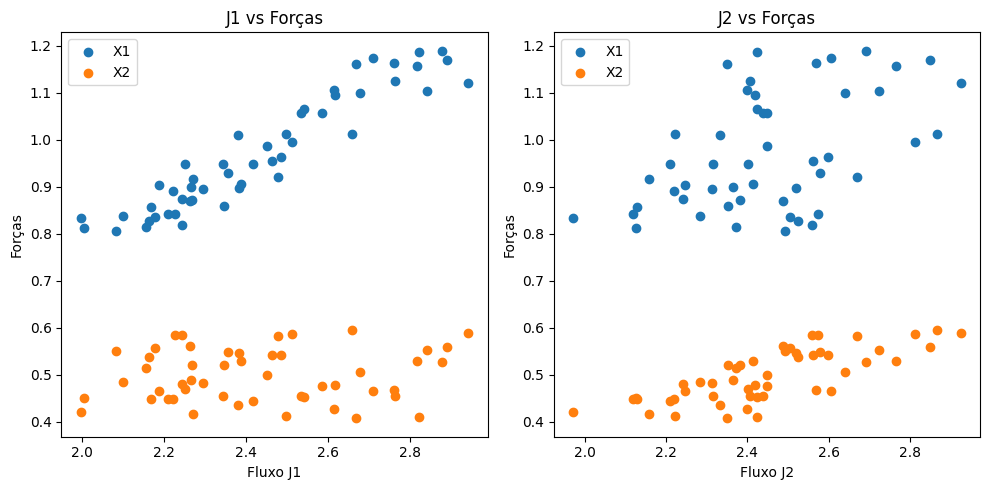

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------------------
# 1) Modelo simples de Onsager
# ----------------------------------------
# Suponha um sistema com:
# J1 = L11 * X1 + L12 * X2
# J2 = L21 * X1 + L22 * X2
# Queremos estimar os Lij numericamente

# Forças termodinâmicas impostas
X1 = 1.0  # gradiente de temperatura
X2 = 0.5  # gradiente de concentração

# Coeficientes verdadeiros (hipotéticos)
L11_true = 2.0
L12_true = 1.0
L21_true = 1.0
L22_true = 3.0

# Fluxos gerados
J1 = L11_true * X1 + L12_true * X2
J2 = L21_true * X1 + L22_true * X2

# ----------------------------------------
# 2) Medições experimentais simuladas
# ----------------------------------------
# Simular algumas medições variando X1 e X2
n_measurements = 50
X1_vals = np.random.uniform(0.8, 1.2, n_measurements)
X2_vals = np.random.uniform(0.4, 0.6, n_measurements)

J1_vals = L11_true * X1_vals + L12_true * X2_vals + np.random.normal(0, 0.05, n_measurements)
J2_vals = L21_true * X1_vals + L22_true * X2_vals + np.random.normal(0, 0.05, n_measurements)

# ----------------------------------------
# 3) Estimar Lij por mínimos quadrados
# ----------------------------------------
# Matriz de design
X = np.vstack([X1_vals, X2_vals]).T

# Resolução: J = X @ L
L1_est, _, _, _ = np.linalg.lstsq(X, J1_vals, rcond=None)
L2_est, _, _, _ = np.linalg.lstsq(X, J2_vals, rcond=None)

# Matriz estimada
L_est = np.vstack([L1_est, L2_est])

# ----------------------------------------
# 4) Mostrar resultados
# ----------------------------------------
print("Matriz L verdadeira:")
print(np.array([[L11_true, L12_true], [L21_true, L22_true]]))

print("\nMatriz L estimada:")
print(L_est)

print("\nSimetria Onsager (diferença L12 vs L21):")
print(f"L12 - L21 = {L_est[0,1] - L_est[1,0]:.4f}")

# ----------------------------------------
# 5) Visualização
# ----------------------------------------
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(J1_vals, X1_vals, label="X1")
plt.scatter(J1_vals, X2_vals, label="X2")
plt.title("J1 vs Forças")
plt.xlabel("Fluxo J1")
plt.ylabel("Forças")
plt.legend()

plt.subplot(1,2,2)
plt.scatter(J2_vals, X1_vals, label="X1")
plt.scatter(J2_vals, X2_vals, label="X2")
plt.title("J2 vs Forças")
plt.xlabel("Fluxo J2")
plt.ylabel("Forças")
plt.legend()

plt.tight_layout()
plt.show()


# Prigogine: Simulação de estrutura dissipativa (ex: rolos de Bénard ou reação de Belousov-Zhabotinsky):

* Difusão (espalhamento de substâncias químicas)
* Reação não linear (produção e remoção de reagentes)
* Isso exemplifica o princípio de Prigogine: ordem local surge em sistemas abertos longe do equilíbrio, mantida pelo fluxo contínuo de energia e matéria.
* Difusão: faz U e V se espalharem.
* Reação química não-linear: U e V se transformam entre si e competem.
* Fonte e sumidouro (F e k): mantêm o sistema longe do equilíbrio.
* Esse conflito entre espalhar e reagir quebra a simetria homogênea → surge uma estrutura espacial regular, chamada padrão de Turing.

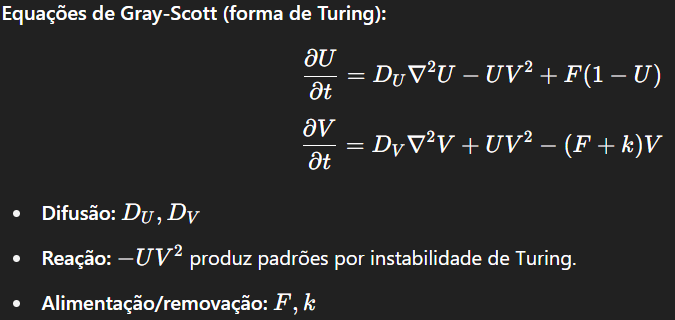

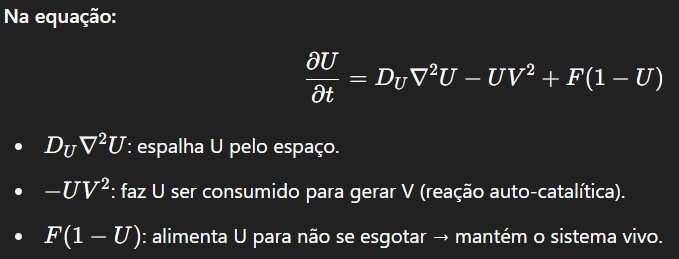

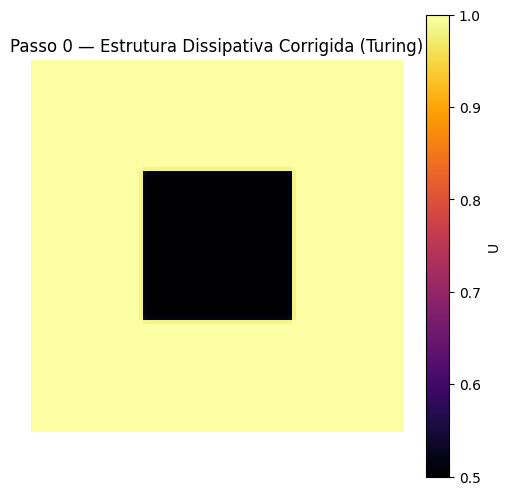

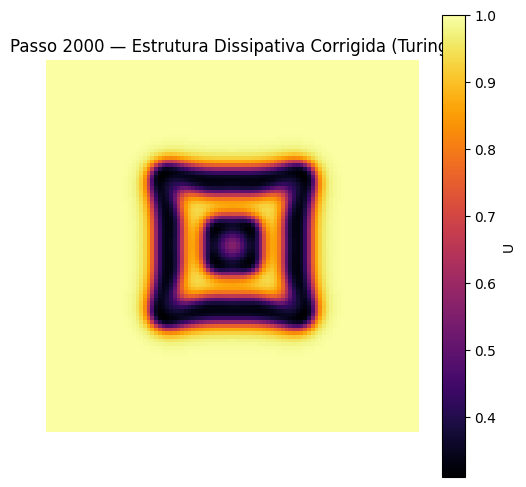

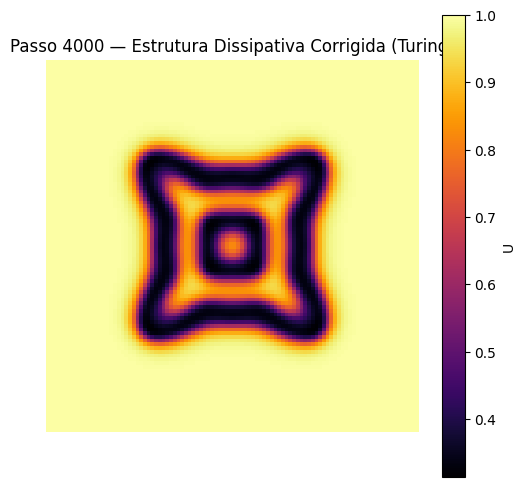

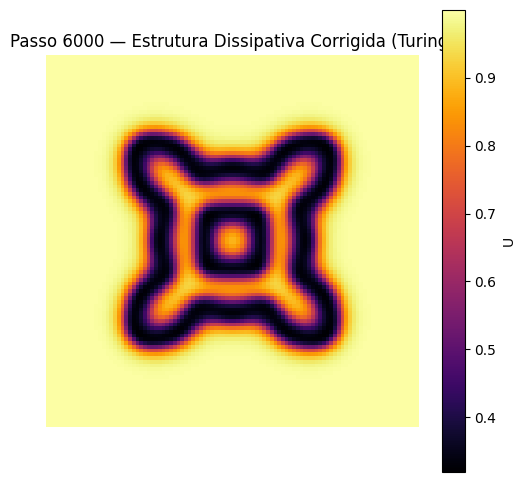

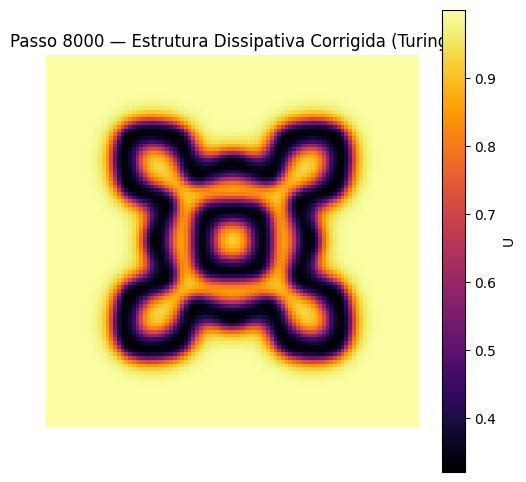

In [ ]:
# ✅ Vamos corrigir e explicar claramente.
# Problemas comuns:
# 1) Laplaciano mal escalonado (dx muito grande).
# 2) Passo dt muito grande para estabilidade.
# 3) Sem imposição de limites (não-negatividade).

import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do modelo Gray-Scott (Turing)
Du, Dv = 0.16, 0.08  # difusão
F, k = 0.060, 0.062  # alimentação e remoção

# Dimensão da malha
N = 100
dx = 1.0  # usando dx=1.0 ajuda a estabilidade

# Passo de tempo reduzido para estabilidade de reação-difusão explícita
dt = 0.2

# Inicializa U e V
U = np.ones((N, N))
V = np.zeros((N, N))

# Semente no centro
r = 20
U[N//2 - r:N//2 + r, N//2 - r:N//2 + r] = 0.50
V[N//2 - r:N//2 + r, N//2 - r:N//2 + r] = 0.25

# Operador laplaciano com dx=1.0
def laplacian(Z):
    return (-4 * Z + np.roll(Z, 1, axis=0) + np.roll(Z, -1, axis=0) +
            np.roll(Z, 1, axis=1) + np.roll(Z, -1, axis=1))

# Simulação
n_steps = 10000
plot_every = 2000

for n in range(n_steps):
    Lu = laplacian(U)
    Lv = laplacian(V)

    uvv = U * V * V

    U += (Du * Lu - uvv + F * (1 - U)) * dt
    V += (Dv * Lv + uvv - (F + k) * V) * dt

    # Garante não-negatividade para estabilidade
    U = np.clip(U, 0, 1.0)
    V = np.clip(V, 0, 1.0)

    if n % plot_every == 0:
        plt.figure(figsize=(6, 6))
        plt.imshow(U, cmap='inferno')
        plt.title(f'Passo {n} — Estrutura Dissipativa Corrigida (Turing)')
        plt.colorbar(label='U')
        plt.axis('off')
        plt.show()